In [54]:
# Import neccesities and Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/drive/MyDrive/2178/INF2178_A3_data.csv")
df.head(4)


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2


In [55]:
#Show data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [56]:
# Check for missing values
print(df.isnull().sum())

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64


In [57]:
# Exploratory Data Analysis (EDA)
df.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


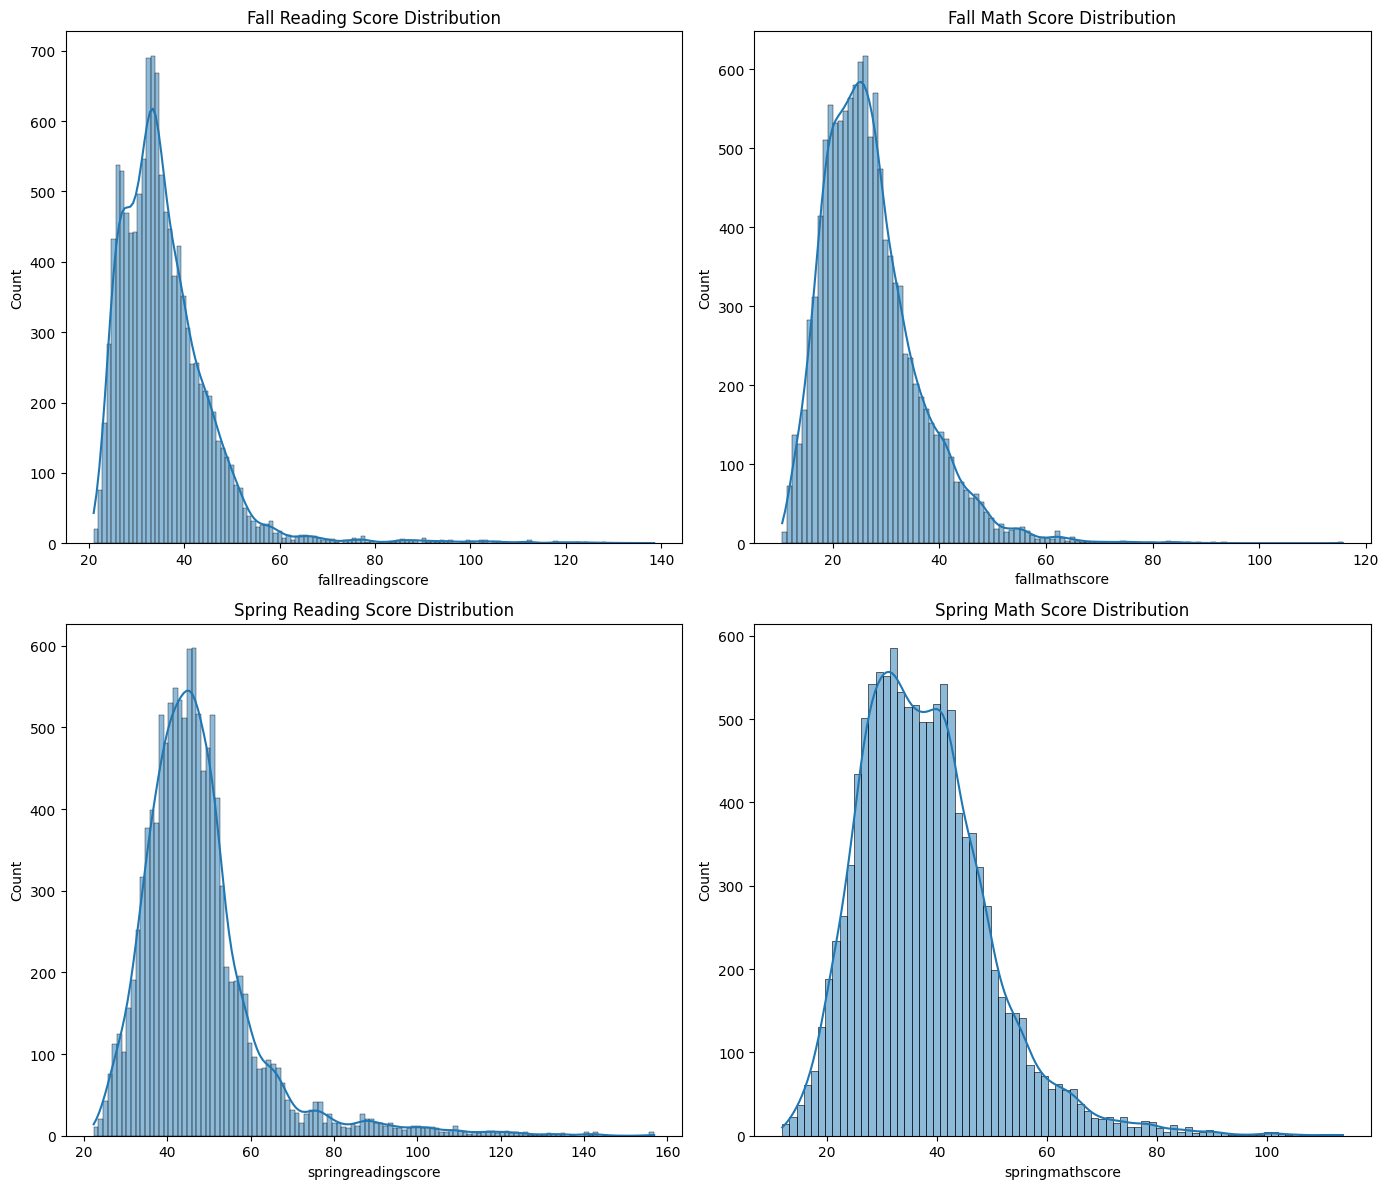

In [58]:
# Plot distributions of scores
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Reading and math scores in the fall
sns.histplot(data=df, x='fallreadingscore', kde=True, ax=axs[0, 0]).set_title('Fall Reading Score Distribution')
sns.histplot(data=df, x='fallmathscore', kde=True, ax=axs[0, 1]).set_title('Fall Math Score Distribution')

# Reading and math scores in the spring
sns.histplot(data=df, x='springreadingscore', kde=True, ax=axs[1, 0]).set_title('Spring Reading Score Distribution')
sns.histplot(data=df, x='springmathscore', kde=True, ax=axs[1, 1]).set_title('Spring Math Score Distribution')

plt.tight_layout()
plt.show()

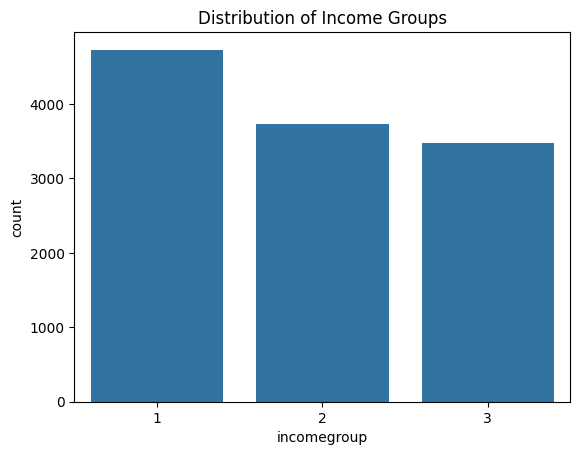

In [59]:
# Checking distribution of income groups
sns.countplot(x='incomegroup', data=df)
plt.title('Distribution of Income Groups')
plt.show()

In [60]:
%pip install -q dfply
from dfply import *
# summary statistics for dependent variable yield
df >> group_by(X.incomegroup) >> summarize(n=X['springmathscore'].count(), mean=X['springmathscore'].mean(), std=X['springmathscore'].std())

,incomegroup,n,mean,std
0,1,4729,33.883051,10.734653
1,2,3726,38.464691,11.359349
2,3,3478,42.411898,12.605759


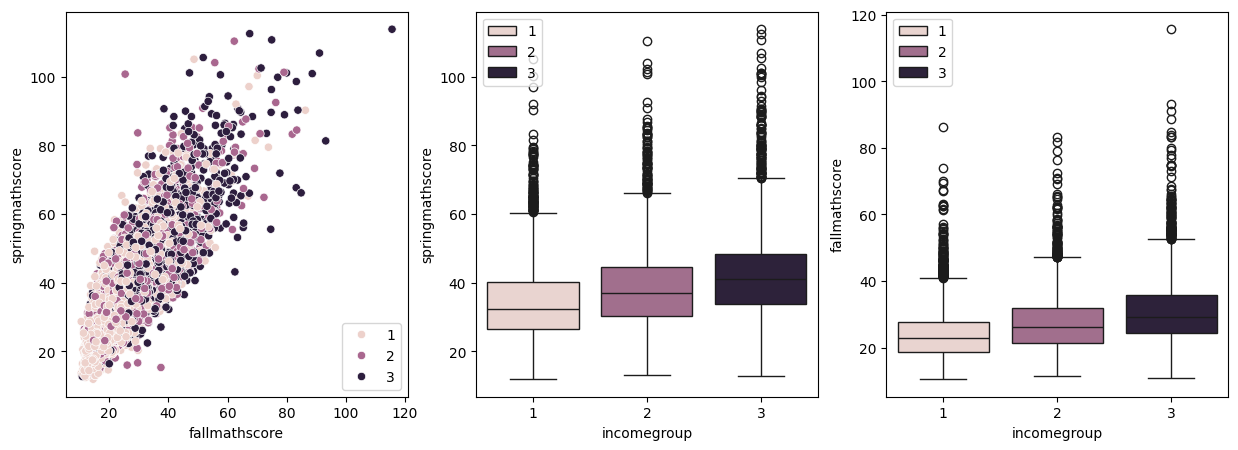

In [61]:
# show Boxplot and Scatter plot of math score
fig, axs = plt.subplots(ncols=3,figsize=(15, 5))
sns.scatterplot(data=df, x="fallmathscore", y="springmathscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springmathscore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallmathscore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.show()

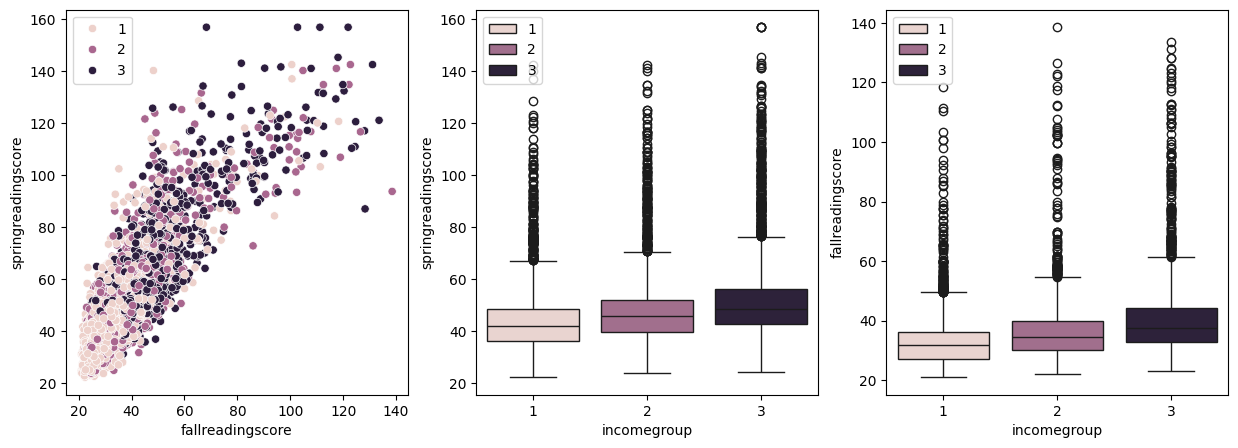

In [62]:
# show Boxplot and Scatter plot of reading score
fig, axs = plt.subplots(ncols=3,figsize=(15, 5))
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.show()

## ANCOVA on Math score

In [63]:
# ANCOVA Table
%pip install -q pingouin
from pingouin import ancova
ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [64]:
#ANCOVA using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANCOVA
model = ols('springmathscore ~ incomegroup + fallmathscore', data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:08:15   Log-Likelihood:                -39805.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11930   BIC:                         7.964e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7862      0.215     36.286

In [65]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springmathscore ~ incomegroup* fallmathscore', data=df).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     8505.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:08:15   Log-Likelihood:                -39787.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11929   BIC:                         7.961e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

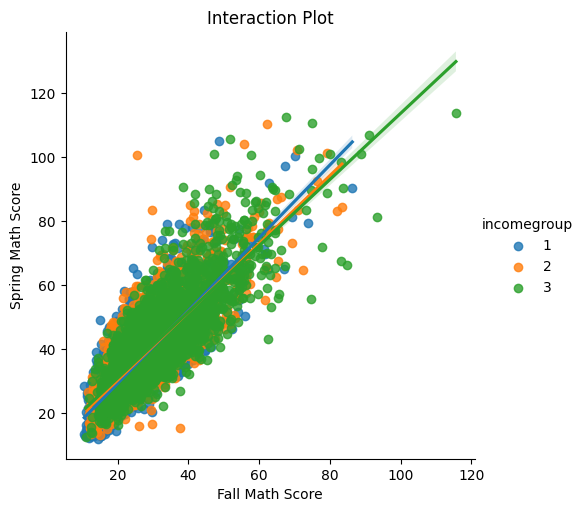

In [66]:
# Interaction Plot for math score across Spring ang Fall
sns.lmplot(x='fallmathscore',y='springmathscore',hue='incomegroup',data=df)
# set the xy labels and title
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

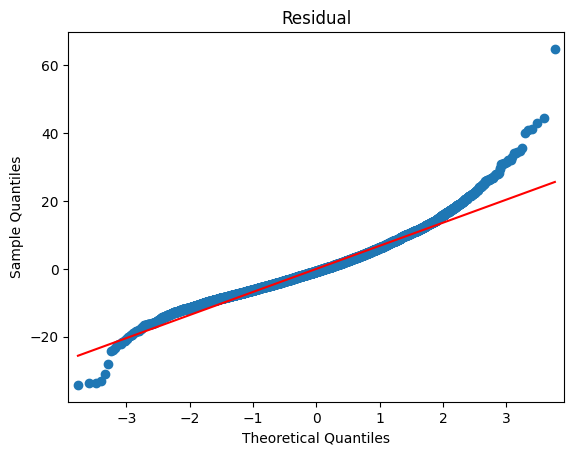

Shapiro-Wilk test statistic: 0.9649483561515808
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [67]:
# Normality of residuals: Q-Q plot and Shapiro-Wilk test
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Residual')
plt.show()

from scipy import stats
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

In [68]:
# Homogeneity of variances: Levene's test
levene_test = stats.levene(df['springmathscore'][df['incomegroup'] == 1],
                           df['springmathscore'][df['incomegroup'] == 2],
                           df['springmathscore'][df['incomegroup'] == 3])
levene_test

LeveneResult(statistic=18.899850238111785, pvalue=6.380804527269148e-09)

## ANCOVA on Reading score

In [69]:
# Reading ANCOVA
ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [70]:
# Perform the ANCOVA
model2 = ols('springreadingscore ~ incomegroup + fallreadingscore', data=df).fit()

# Print the summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:08:20   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11930   BIC:                         8.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3272      0.280  

In [71]:
# Fit the ANCOVA model with interaction term
model_interaction2 = sm.formula.ols('springreadingscore ~ incomegroup * fallreadingscore', data=df).fit()
print(model_interaction2.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8934.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:08:20   Log-Likelihood:                -41673.
No. Observations:               11933   AIC:                         8.335e+04
Df Residuals:                   11929   BIC:                         8.338e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

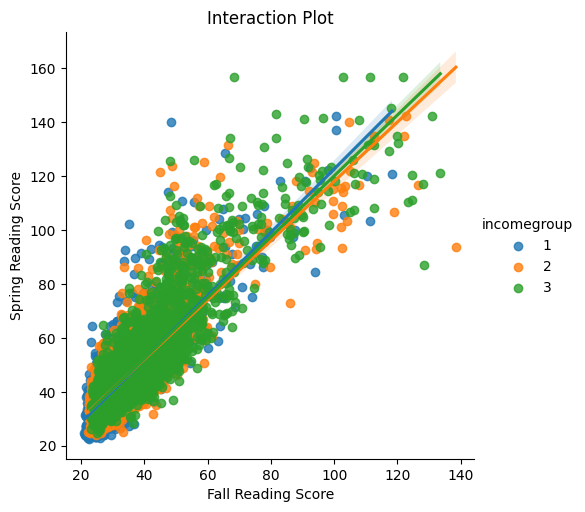

In [72]:
# Interaction Plot for reading score across Spring ang Fall
sns.lmplot(x='fallreadingscore',y='springreadingscore',hue='incomegroup',data=df)
# set the xy labels and title
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

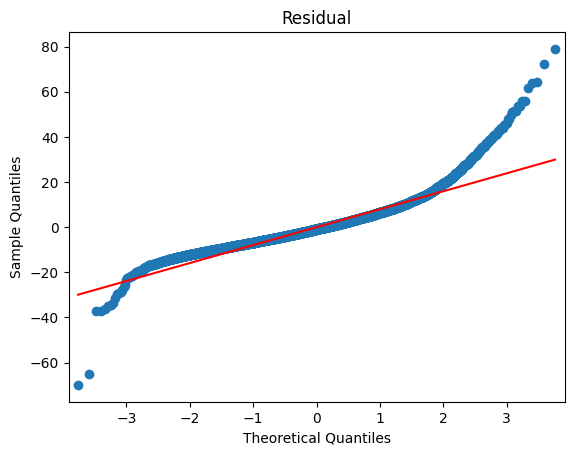

Shapiro-Wilk test statistic: 0.9120939373970032
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [73]:
# Normality of residuals: Q-Q plot and Shapiro-Wilk test
residuals = model2.resid
sm.qqplot(residuals, line='s')
plt.title('Residual')
plt.show()

from scipy import stats
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

In [74]:
# Homogeneity of variances: Levene's test
levene_test = stats.levene(df['springreadingscore'][df['incomegroup'] == 1],
                           df['springreadingscore'][df['incomegroup'] == 2],
                           df['springreadingscore'][df['incomegroup'] == 3])
levene_test

LeveneResult(statistic=39.5528295964788, pvalue=7.570499656193536e-18)